<a href="https://colab.research.google.com/github/leonatopl/dataxgurupl/blob/master/Forecast_vacc_4weekslag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> <font color='blue'> Group 2 - Final Project - November 26th, 2022 </center> </font>

# <center><font color=green>Time Series - Linear Regression</font> </center>

##  Approach: Machine Learning Supervised Linear Regression

![SL.jpg](attachment:SL.jpg)

- This model was retrieved from the course materils on canvas. https://unt.instructure.com/courses/75716/modules

## STEP 1: Import Libraries

In [ ]:
#Importing nececcary libraries
import numpy as np
import pandas as pd

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt


import seaborn as sns
sns.set(color_codes=True)

# filter warnings
import warnings
warnings.filterwarnings('ignore')



## <font color=grey> WORKFLOW: DATA SET </font>

## STEP 2: Data description and Load the Data

Dataset was retrieved from https://data.chhs.ca.gov/dataset/vaccine-progress-dashboard

In [ ]:
#Dataset location
covid_vaccines = 'covid19vaccineCleaned.csv'

In [ ]:
#Using Pandas DataFrame to load the data

df = pd.read_csv(covid_vaccines)

In [ ]:
#Display the first five rows in the dataset
df.head()

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,...,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,booster_recip_count,bivalent_booster_recip_count,cumulative_booster_recip_count,cumulative_bivalent_booster_recip_count,booster_eligible_population,bivalent_booster_eligible_population
0,Alameda,1/5/20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1396064,1396064
1,Alameda,7/27/20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1396064,1396064
2,Alameda,7/30/20,0,2,0,0,0,2,0,0,...,0,0,0,2,0,0,0,0,1396064,1396064
3,Alameda,7/31/20,0,2,0,0,0,2,0,0,...,0,0,0,2,0,0,0,0,1396064,1396064
4,Alameda,8/1/20,0,2,0,0,0,2,0,0,...,0,0,0,2,0,0,0,0,1396064,1396064


## <font color=grey> WORKFLOW: Clean and Preprocess the Dataset </font>

## STEP 3: Clean the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49737 entries, 0 to 49736
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   county                                   49737 non-null  object
 1   administered_date                        49737 non-null  object
 2   total_doses                              49737 non-null  int64 
 3   cumulative_total_doses                   49737 non-null  int64 
 4   pfizer_doses                             49737 non-null  int64 
 5   cumulative_pfizer_doses                  49737 non-null  int64 
 6   moderna_doses                            49737 non-null  int64 
 7   cumulative_moderna_doses                 49737 non-null  int64 
 8   jj_doses                                 49737 non-null  int64 
 9   cumulative_jj_doses                      49737 non-null  int64 
 10  partially_vaccinated                     49737 non-null  i

In [ ]:
#Checking for missing values

df.isnull().sum()

county                                     0
administered_date                          0
total_doses                                0
cumulative_total_doses                     0
pfizer_doses                               0
cumulative_pfizer_doses                    0
moderna_doses                              0
cumulative_moderna_doses                   0
jj_doses                                   0
cumulative_jj_doses                        0
partially_vaccinated                       0
total_partially_vaccinated                 0
fully_vaccinated                           0
cumulative_fully_vaccinated                0
at_least_one_dose                          0
cumulative_at_least_one_dose               0
booster_recip_count                        0
bivalent_booster_recip_count               0
cumulative_booster_recip_count             0
cumulative_bivalent_booster_recip_count    0
booster_eligible_population                0
bivalent_booster_eligible_population       0
dtype: int

## STEP 4: Data Preparation and Visualization


In [ ]:
df1=df[['administered_date','total_doses']]
df1.head()

,administered_date,total_doses
0,1/5/20,0
1,7/27/20,0
2,7/30/20,0
3,7/31/20,0
4,8/1/20,0


In [ ]:
# converting date from datatype to datatime datatype
df1['administered_date'] = pd.to_datetime(df1['administered_date'])
print(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49737 entries, 0 to 49736
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   administered_date  49737 non-null  datetime64[ns]
 1   total_doses        49737 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 777.3 KB
None


,administered_date,total_doses
0,2020-01-05,0
1,2020-07-27,0
2,2020-07-30,0
3,2020-07-31,0
4,2020-08-01,0


In [ ]:
df1.describe()

,total_doses
count,49737.000000
mean,1705.813961
std,5877.405980
min,0.000000
25%,9.000000
50%,156.000000
75%,1047.000000
max,140186.000000


In [ ]:
#convert to the weekly period and then sum the numbers in the period
df1['administered_date'] = df1['administered_date'].dt.to_period("W")
monthly_vac = df1.groupby('administered_date').sum().reset_index()
print(monthly_vac)

         administered_date  total_doses
0    2019-12-30/2020-01-05            1
1    2020-07-27/2020-08-02           60
2    2020-08-03/2020-08-09          102
3    2020-08-10/2020-08-16          171
4    2020-08-17/2020-08-23          227
..                     ...          ...
117  2022-10-17/2022-10-23       587833
118  2022-10-24/2022-10-30       573149
119  2022-10-31/2022-11-06       499365
120  2022-11-07/2022-11-13       455067
121  2022-11-14/2022-11-20       124851

[122 rows x 2 columns]


In [ ]:
monthly_vac['administered_date'] = monthly_vac['administered_date'].dt.to_timestamp()


### Step 4.1 Visualize actual doses administered vs periods of elevated cases and deaths

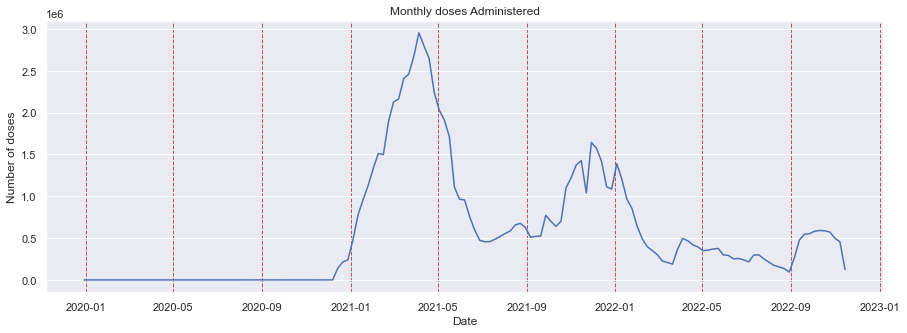

In [ ]:

plt.figure(figsize=(15,5))
plt.plot(monthly_vac['administered_date'],monthly_vac['total_doses'])
plt.xlabel('Date')
plt.ylabel('Number of doses')
plt.title('Monthly doses Administered')
plt.grid(color='r', axis = 'x', linestyle='--', linewidth=1)
plt.show()



In [ ]:
# create a clolumn with the differences on the monthly vaccines
# to make this data stationary, increase or decrease in doses
monthly_vac['doses_diff'] = monthly_vac['total_doses'].diff()
# drop the months where data is not available
monthly_vac = monthly_vac.dropna()
print(monthly_vac)

    administered_date  total_doses  doses_diff
1          2020-07-27           60        59.0
2          2020-08-03          102        42.0
3          2020-08-10          171        69.0
4          2020-08-17          227        56.0
5          2020-08-24          337       110.0
..                ...          ...         ...
117        2022-10-17       587833     -3115.0
118        2022-10-24       573149    -14684.0
119        2022-10-31       499365    -73784.0
120        2022-11-07       455067    -44298.0
121        2022-11-14       124851   -330216.0

[121 rows x 3 columns]


### STEP 4.2 Calulate the sales difference (stationarize time series)

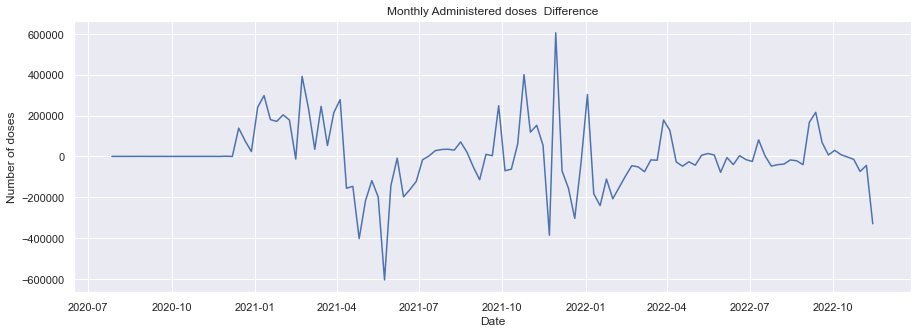

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(monthly_vac['administered_date'],monthly_vac['doses_diff'])
plt.xlabel('Date')
plt.ylabel('Number of doses')
plt.title('Weekly Administered doses  Difference')
plt.show()

In [ ]:
# dropping off sales and date to deal just with stacionary data
df2 = monthly_vac.drop(['administered_date','total_doses'],axis=1)
print(df2.head())
print(df2.shape)

   doses_diff
1        59.0
2        42.0
3        69.0
4        56.0
5       110.0
(121, 1)


### STEP 4.3 Create the variables for week lag 1, lag 2, lag 3 and lag 4

In [ ]:
# Preparing the supervised data
for i in range(1,5):
    col_name = 'week_' + str(i)
    df2[col_name] = df2['doses_diff'].shift(i)
print(df2.head())
df2 = df2.dropna().reset_index(drop=True)
df2.head(29)

   doses_diff  week_1  week_2  week_3  week_4
1        59.0     NaN     NaN     NaN     NaN
2        42.0    59.0     NaN     NaN     NaN
3        69.0    42.0    59.0     NaN     NaN
4        56.0    69.0    42.0    59.0     NaN
5       110.0    56.0    69.0    42.0    59.0


,doses_diff,week_1,week_2,week_3,week_4
0,110.0,56.0,69.0,42.0,59.0
1,143.0,110.0,56.0,69.0,42.0
2,-42.0,143.0,110.0,56.0,69.0
3,-12.0,-42.0,143.0,110.0,56.0
4,37.0,-12.0,-42.0,143.0,110.0
5,-170.0,37.0,-12.0,-42.0,143.0
6,-63.0,-170.0,37.0,-12.0,-42.0
7,-22.0,-63.0,-170.0,37.0,-12.0
8,-34.0,-22.0,-63.0,-170.0,37.0
9,-10.0,-34.0,-22.0,-63.0,-170.0


In [ ]:
df2.shape

(117, 5)

## STEP 5: Split the data in training and test

In [ ]:
# split the data between train and test data
df2_train = df2.iloc[:-41]
#print(df2_train.head())
df2_test = df2.iloc[-41:]
#print(df2_test.head())
print("Train data Shape", df2_train.shape)
print("Test data Shape", df2_test.shape)

Train data Shape (76, 5)
Test data Shape (41, 5)


### STEP 5.1 Transform the data in smaller scale

In [ ]:
#scale the values between -1 and 1
scaler =MinMaxScaler(feature_range=(-1,1))
scaler.fit(df2_train)
df2_train = scaler.transform(df2_train)
df2_test = scaler.transform(df2_test)

### STEP 5.2 Get the X and Y variables fot training and test data

In [ ]:
X_train, Y_train = df2_train[:,1:], df2_train[:,0:1]
X_test, Y_test = df2_test[:,1:], df2_test[:,0:1]
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()
print('X_train Shape', X_train.shape)
print('Y_train Shape', Y_train.shape)
print('X_test Shape', X_test.shape)
print('Y_test Shape', Y_test.shape)


X_train Shape (76, 4)
Y_train Shape (76,)
X_test Shape (41, 4)
Y_test Shape (41,)


In [ ]:
# Make a prediction data frame to merge the predicted
doses_dates = monthly_vac['administered_date'][-41:].reset_index(drop=True)

In [ ]:
predict_df = pd.DataFrame(doses_dates)
predict_df.head()

,administered_date
0,2022-02-07
1,2022-02-14
2,2022-02-21
3,2022-02-28
4,2022-03-07


In [ ]:
act_doses = monthly_vac['total_doses'][-42:].to_list()
print(act_doses)

[646017, 494228, 397874, 352295, 300866, 225824, 208574, 189722, 368029, 495224, 468160, 420129, 393861, 350550, 356018, 370074, 376855, 298748, 293060, 252926, 256406, 240591, 215756, 296781, 299775, 252301, 211658, 174082, 156658, 135105, 94573, 261954, 477769, 546434, 553331, 582720, 590948, 587833, 573149, 499365, 455067, 124851]


## STEP 6: Build and and train the Model

In [ ]:
# Create the linear regression model and predicted output
model = LinearRegression()
model.fit(X_train, Y_train)
lr_pre = model.predict(X_test)

### STEP 6.1 Transform the data back to original scale

In [ ]:
# transform the values back to the original scale
lr_pre = lr_pre.reshape(-1,1)
# Create a matrix with the X test and predicted doses
lr_pre_test_set = np.concatenate([lr_pre, X_test], axis=1)
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)


In [ ]:
result_list = []
for i2 in range(0, len(lr_pre_test_set)):
    result_list.append(lr_pre_test_set[i2][0] + act_doses[i2])
lr_pre_series = pd.Series(result_list, name = 'Linear Prediction')
predict_df = predict_df.merge(lr_pre_series, left_index = True, right_index = True)
print(predict_df.shape)
print(monthly_vac.shape)
predict_df


(41, 2)
(121, 3)


,administered_date,Linear Prediction
0,2022-02-07,523649.888005
1,2022-02-14,386046.856277
2,2022-02-21,312774.787282
3,2022-02-28,272622.884373
4,2022-03-07,243233.424820
5,2022-03-14,181632.881283
6,2022-03-21,182190.672122
7,2022-03-28,162469.407557
8,2022-04-04,384042.069589
9,2022-04-11,526574.673285


## STEP 7: Model Evaluation

In [ ]:
# Evaluation of the model : Calculate the the meanSquared error, MAE and R2
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'], monthly_vac['total_doses'][-41:]))
lr_mae = mean_absolute_error(predict_df['Linear Prediction'],monthly_vac['total_doses'][-41:])
lr_r2 = r2_score(predict_df['Linear Prediction'],monthly_vac['total_doses'][-41:])
print('Linear regression MSE', lr_mse )
print('Linear regression MAE', lr_mae )
print('Linear regression R2', lr_r2 )

Linear regression MSE 83297.38304324557
Linear regression MAE 54024.10710838589
Linear regression R2 0.7114574966795546


## STEP 8: Visualization of predictions

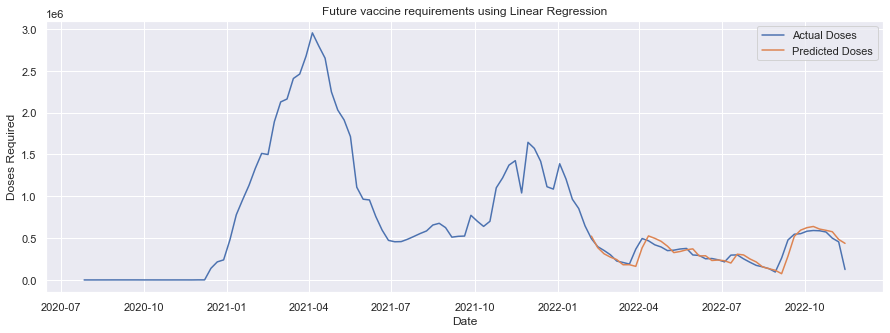

In [ ]:
#Visualize the prediction
plt.figure(figsize=(15,5))
# actual sales
plt.plot(monthly_vac['administered_date'], monthly_vac['total_doses'])
# predicted sales
plt.plot(predict_df['administered_date'],predict_df['Linear Prediction'])
plt.title("Future vaccine requirements using Linear Regression")
plt.xlabel("Date")
plt.ylabel("Doses Required")
plt.legend(['Actual Doses', 'Predicted Doses'])
plt.show()